In [1]:
import numpy as np
import operator
import networkx as nx
import matplotlib.pyplot as plt
import pylab

In [32]:
trusted_pages_ratio = 0.4
trusted_pages = []
maxer = 0
nodes_dict = {}
nodes = []
count = 0
beta = 0.85

In [30]:
import pandas as pd

# Define the file path and name
file_path = r'D:\Fraud_Analytics\fa1\Total.csv'

# Use pandas to read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   Sender  Receiver  Amount
0    1309      1011  123051
1    1309      1011  118406
2    1309      1011  112456
3    1309      1011  120593
4    1309      1011  166396


In [31]:
import pandas as pd

# Define the file path and name
file_path = r'D:\Fraud_Analytics\fa1\bad_sender.csv'

# Use pandas to read the CSV file
bn = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(bn.head())

   Bad Sender
0        1303
1        1259
2        1562
3        1147
4        1393


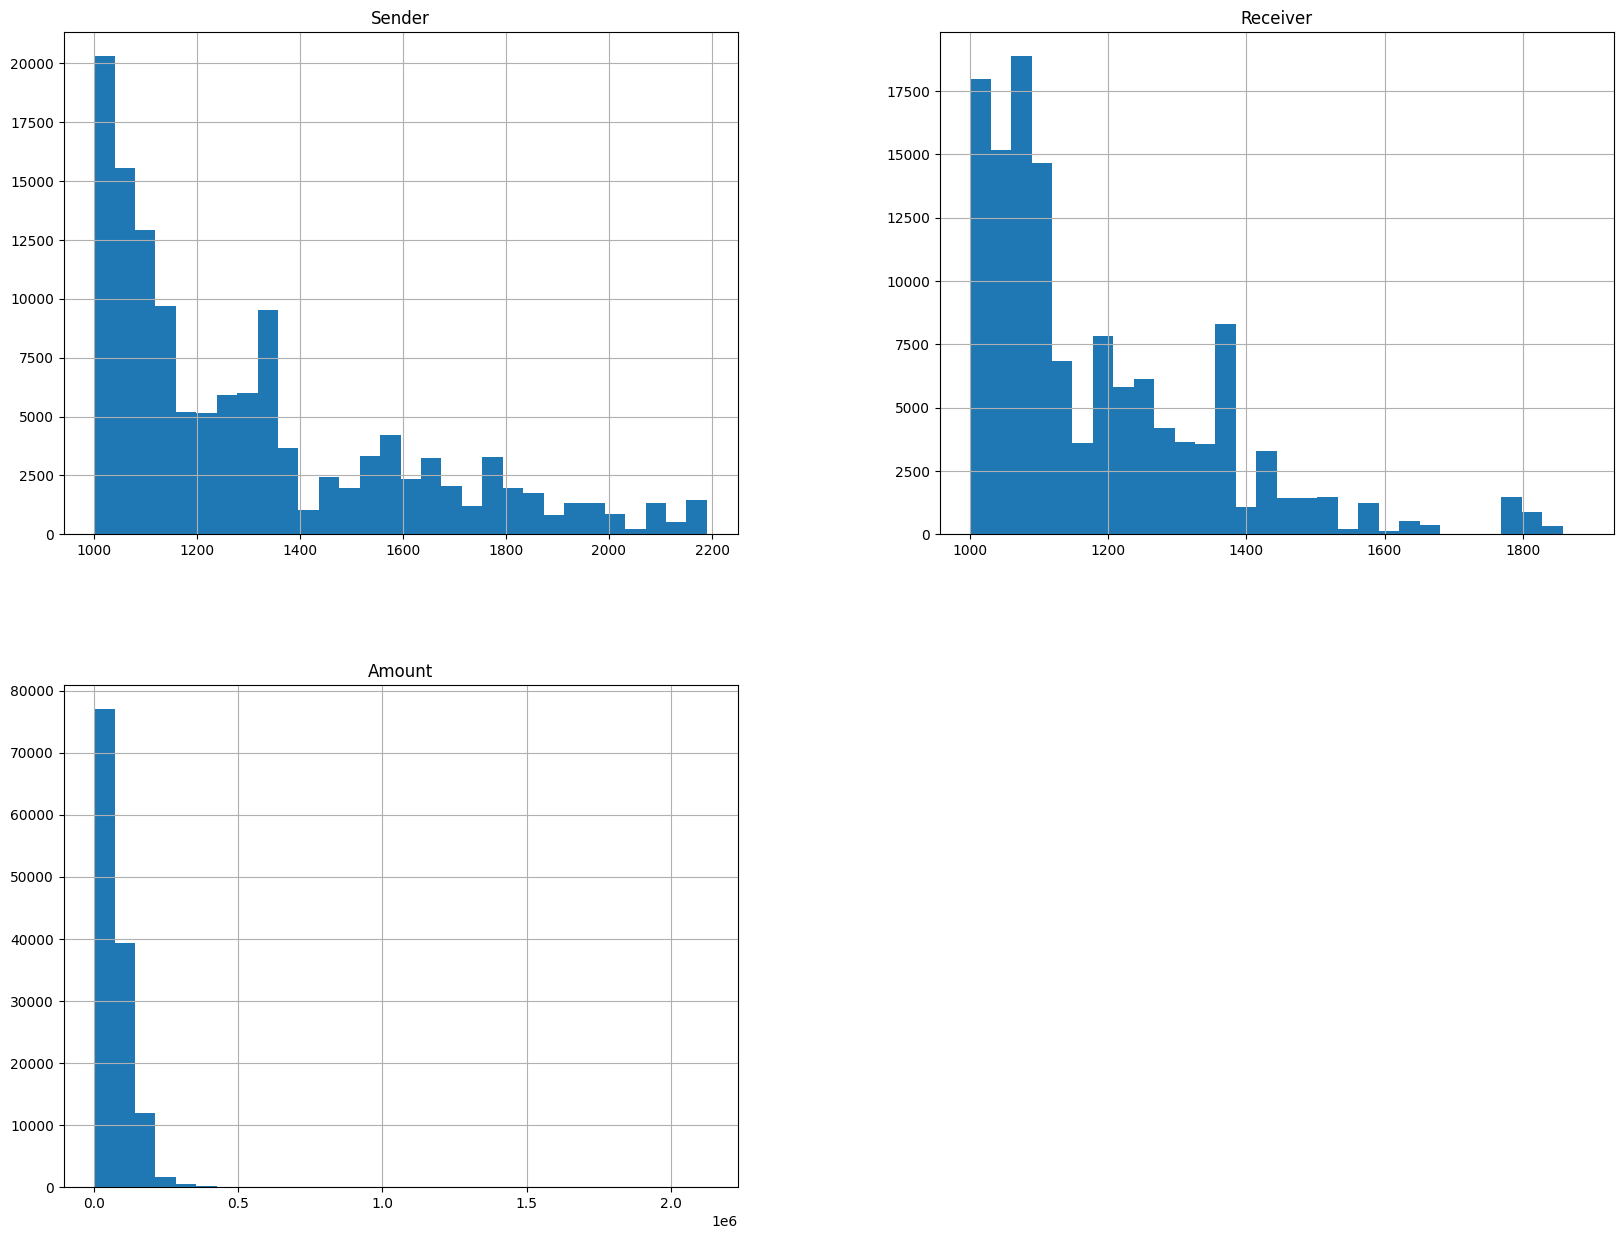

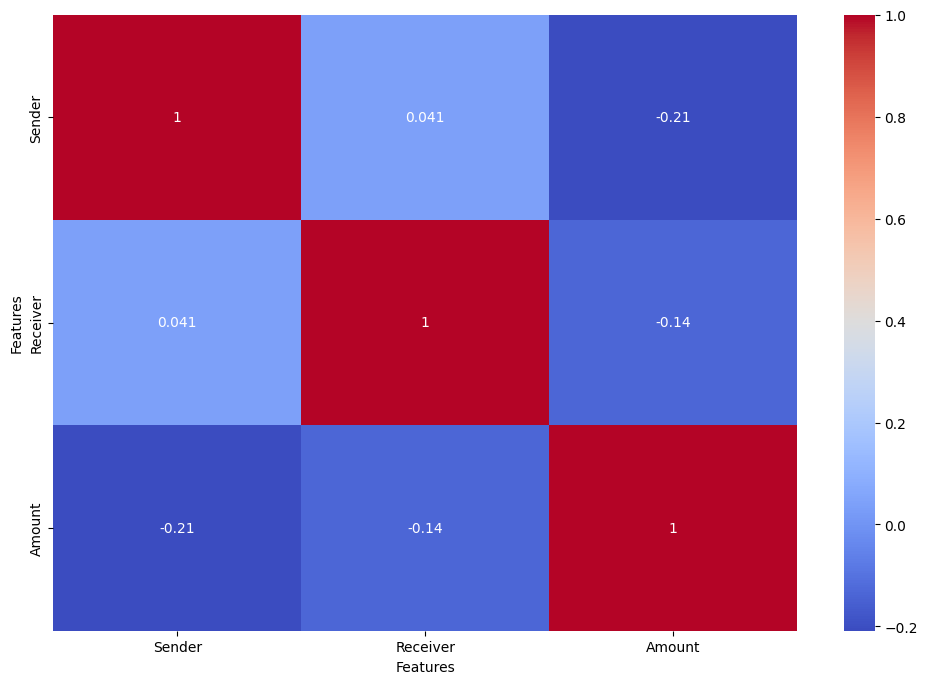

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each column
df.hist(bins=30, figsize=(20,15))
plt.xlabel("Feature value")
plt.ylabel("Frequency")
plt.show()

# Plot correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [71]:
df.describe()

,Sender,Receiver,Amount
count,130535.000000,130535.000000,1.305350e+05
mean,1309.358287,1182.851258,6.980968e+04
std,294.435026,169.809657,5.696676e+04
min,1001.000000,1001.000000,1.501000e+03
25%,1078.000000,1060.000000,2.411100e+04
50%,1214.000000,1112.000000,5.622000e+04
75%,1488.000000,1276.000000,1.079405e+05
max,2190.000000,1887.000000,2.124500e+06


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130535 entries, 0 to 130534
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   Sender    130535 non-null  int64
 1   Receiver  130535 non-null  int64
 2   Amount    130535 non-null  int64
dtypes: int64(3)
memory usage: 3.0 MB


In [73]:
import pandas as pd
import numpy as np
from collections import defaultdict

# Assuming data_frame is your DataFrame and it has columns 'Sender' and 'Receiver' that represent the edges in your graph
nodes = pd.unique(df[['Sender', 'Receiver']].values.ravel('K'))

# Function to get dictionary of edges
def create_edge_dict(df):
    edge_dict = defaultdict(list)
    for _, row in df.iterrows():
        sender, receiver = row['Sender'], row['Receiver']
        edge_dict[sender].append(receiver)
    return edge_dict

# edge_dictionary contains the adjacency list representation
edge_dictionary = create_edge_dict(df)

# Initialize the Transition matrix and the vector
transition_matrix = np.zeros((len(nodes), len(nodes)))
vector = np.zeros(len(nodes))

# Create a mapping of node values to indices
node_to_index_mapping = {node: index for index, node in enumerate(nodes)}

# Define the Transition matrix
for source_node in edge_dictionary:
    edge_length = len(edge_dictionary[source_node])
    for destination_node in edge_dictionary[source_node]:
        transition_matrix[node_to_index_mapping[destination_node]][node_to_index_mapping[source_node]] = 1/edge_length

In [74]:
transition_matrix

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.0004771, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [75]:
# Assuming 'bn' is a DataFrame with a single column that contains the list of bad nodes
bad_nodes = bn.iloc[:, 0].tolist()

# Create a DataFrame from nodes
nodes_df = pd.DataFrame(nodes, columns=['node'])

# Add a new column 'is_bad' that is 1 if the node is bad and 0 otherwise
nodes_df['is_bad'] = nodes_df['node'].isin(bad_nodes).astype(int)

# Create the vector
vector = 1 - nodes_df['is_bad'].values

# Normalize the vector
vector = vector / vector.sum()

print(vector.sum())
vector

1.0


array([0.0012837, 0.       , 0.0012837, 0.       , 0.       , 0.0012837,
       0.       , 0.       , 0.0012837, 0.       , 0.       , 0.0012837,
       0.       , 0.       , 0.0012837, 0.       , 0.0012837, 0.0012837,
       0.       , 0.       , 0.0012837, 0.0012837, 0.0012837, 0.0012837,
       0.0012837, 0.0012837, 0.0012837, 0.0012837, 0.0012837, 0.0012837,
       0.0012837, 0.0012837, 0.0012837, 0.0012837, 0.0012837, 0.0012837,
       0.0012837, 0.0012837, 0.0012837, 0.0012837, 0.0012837, 0.0012837,
       0.0012837, 0.0012837, 0.0012837, 0.0012837, 0.0012837, 0.0012837,
       0.0012837, 0.0012837, 0.0012837, 0.0012837, 0.0012837, 0.0012837,
       0.0012837, 0.0012837, 0.0012837, 0.0012837, 0.0012837, 0.0012837,
       0.0012837, 0.0012837, 0.0012837, 0.0012837, 0.0012837, 0.0012837,
       0.0012837, 0.0012837, 0.0012837, 0.0012837, 0.0012837, 0.0012837,
       0.0012837, 0.0012837, 0.0012837, 0.0012837, 0.0012837, 0.0012837,
       0.0012837, 0.0012837, 0.0012837, 0.0012837, 

In [89]:
import pandas as pd

damping_factor = 0.85
iteration_limit = 1000
epsilon = 1e-6

trust_scores = vector.copy()
previous_scores = vector.copy()

for i in range(iteration_limit):
    trust_scores = damping_factor * np.dot(transition_matrix, trust_scores) + (1 - damping_factor) * vector
    if np.linalg.norm(previous_scores - trust_scores) < epsilon:
        print(f"Converged after {i} iterations")
        break
    previous_scores = trust_scores.copy()

# Create a DataFrame from the trust scores
trust_scores_df = pd.DataFrame(trust_scores, columns=['trust_score'])

# Filter out nodes with zero trust score
trust_scores_df = trust_scores_df[trust_scores_df['trust_score'] != 0]

# Sort the nodes by trust score in descending order
trust_scores_df = trust_scores_df.sort_values(by='trust_score', ascending=False)

# Reset the index
trust_scores_df.reset_index(level=0, inplace=True)

# Rename the columns
trust_scores_df.columns = ['node_index', 'trust_score']

Converged after 9 iterations


In [90]:
transition_matrix

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.0004771, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [91]:
trust_scores

array([2.64908987e-04, 0.00000000e+00, 1.92554557e-04, 1.29478113e-04,
       0.00000000e+00, 2.67998734e-04, 3.40042589e-06, 3.07190447e-06,
       1.92554557e-04, 0.00000000e+00, 0.00000000e+00, 1.94375807e-04,
       5.15965508e-04, 2.60427956e-04, 1.92554557e-04, 2.89882823e-05,
       2.34218394e-04, 1.92554557e-04, 1.66213801e-04, 0.00000000e+00,
       1.92554557e-04, 1.97617564e-04, 3.95823481e-04, 1.92554557e-04,
       2.24228796e-04, 1.92847350e-04, 2.62015462e-04, 1.92554557e-04,
       1.92554557e-04, 1.92554557e-04, 1.92554557e-04, 2.52161105e-04,
       2.86614166e-04, 1.92554557e-04, 2.16326202e-04, 1.92554557e-04,
       1.92554557e-04, 1.92554557e-04, 2.62691662e-04, 1.14917143e-03,
       2.27441506e-04, 2.05004947e-04, 1.92554557e-04, 1.93345917e-04,
       1.92554557e-04, 2.98552863e-04, 1.92554557e-04, 1.92554557e-04,
       1.92554557e-04, 2.42371041e-04, 2.74342059e-04, 1.96001038e-04,
       1.92554557e-04, 1.92554557e-04, 1.92554557e-04, 1.92554557e-04,
      

In [92]:
trust_rank_node_score

[[39, 0.0011491714221824392],
 [714, 0.001066824810313488],
 [721, 0.0009205182358051301],
 [497, 0.0007614041421066519],
 [335, 0.0007551366401656293],
 [302, 0.0006887817251880855],
 [464, 0.0006743392100138027],
 [361, 0.0006671787346757641],
 [77, 0.0006514023711329174],
 [129, 0.0006232879155698923],
 [383, 0.0006167249361441474],
 [63, 0.0006147503704653537],
 [716, 0.0005992621869763201],
 [406, 0.0005886868535159161],
 [531, 0.0005834791573854005],
 [117, 0.0005662715788783965],
 [580, 0.0005562701115797911],
 [164, 0.0005476424793302299],
 [225, 0.0005465715904162106],
 [792, 0.000541767308325092],
 [12, 0.0005159654891891589],
 [491, 0.0005125082843186759],
 [284, 0.0005123777191799863],
 [66, 0.0005113547386694323],
 [433, 0.0005107424713979246],
 [73, 0.0005103574631187504],
 [405, 0.0004830562342320198],
 [722, 0.00047963702631606997],
 [113, 0.00047646766467759514],
 [125, 0.0004749127793809107],
 [210, 0.00047253462630293577],
 [308, 0.00046429530689596295],
 [137, 0.000

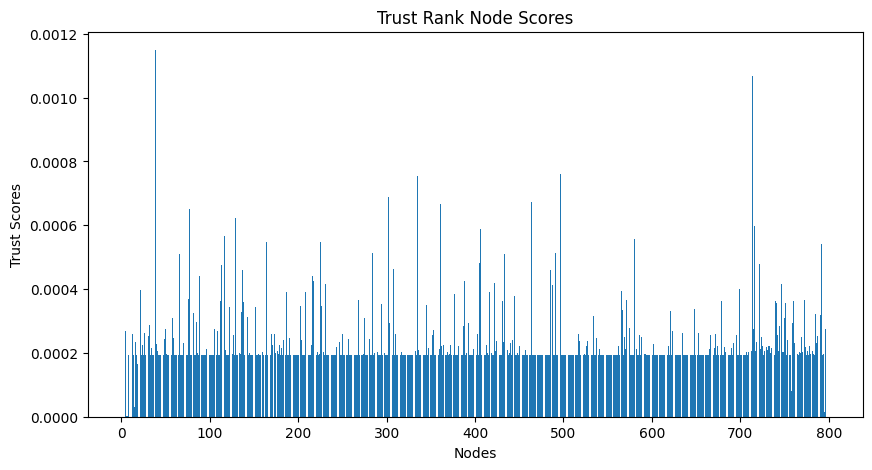

In [93]:
import matplotlib.pyplot as plt

# Unpack nodes and scores
nodes, scores = zip(*trust_rank_node_score)

# Create bar plot
plt.figure(figsize=(10, 5))
plt.bar(nodes, scores)
plt.title('Trust Rank Node Scores')
plt.xlabel('Nodes')
plt.ylabel('Trust Scores')
plt.show()